### Final Course Assignment Part 1

Flight delays are disruptive to travel plans and cause significant direct and indirect costs to passengers and airline companies. United Airlines approached you with a request to help them understand the causes and predict the occurrences of flight delays in order to in order to help them better cope with flight delays. Airlines and transportation authorities have been paying close attention to flight delays over the years and collected detailed information of flight delays of all commercial flights. The file contains information on nonstop United Airlines flights during December 2015. This dataset was obtained from http://www.transtats.bts.gov and went through some preliminary preprocessing for this projects. The dataset contains 11 columns listed below.

Part 1. Data cleanup - Use the following delay -UA-messy.xlsx data file for this part of the assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer

#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("delay-UA-messy.csv")

In [3]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,31,4,SFO,DEN,1418,1758,-31,0,160,137,967
1,31,4,DEN,IAH,1601,1926,9,0,145,134,862
2,31,4,ORD,DEN,1600,1748,36,1,168,155,888
3,31,4,ORD,SFO,1241,1531,7,0,290,291,1846
4,31,4,IAH,SFO,1852,2114,-6,0,262,250,1635
...,...,...,...,...,...,...,...,...,...,...,...
3892,3,4,SFO,IAH,555,1149,-22,0,234,217,1635
3893,3,4,SFO,IAH,1251,1833,36,1,222,219,1635
3894,3,4,IAH,SFO,1602,1824,121,1,262,262,1635
3895,3,4,SFO,ORD,1907,114,29,1,247,244,1846


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DAY_OF_MONTH         3897 non-null   int64 
 1   DAY_OF_WEEK          3897 non-null   int64 
 2   ORIGIN               3897 non-null   object
 3   DEST                 3897 non-null   object
 4   CRS_DEP_TIME         3897 non-null   int64 
 5   CRS_ARR_TIME         3897 non-null   int64 
 6   ARR_DELAY            3897 non-null   int64 
 7   ARR_DEL15            3897 non-null   int64 
 8   CRS_ELAPSED_TIME     3897 non-null   int64 
 9   ACTUAL_ELAPSED_TIME  3897 non-null   int64 
 10  DISTANCE             3897 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 335.0+ KB


In [5]:
df.describe(include='all')

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,3897.000000,3897.000000,3897,3897,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
unique,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ORD,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1039,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16.316397,3.833718,NaN,NaN,1290.279189,1483.204003,16.257891,0.271747,195.208622,185.447524,1210.371311
std,8.902144,1.932262,NaN,NaN,495.277168,533.341270,67.256367,0.444918,51.891678,53.036976,412.897339
min,1.000000,1.000000,NaN,NaN,7.000000,1.000000,-56.000000,0.000000,132.000000,113.000000,862.000000
25%,9.000000,2.000000,NaN,NaN,905.000000,1142.000000,-15.000000,0.000000,155.000000,143.000000,888.000000
50%,17.000000,4.000000,NaN,NaN,1252.000000,1523.000000,-4.000000,0.000000,168.000000,161.000000,967.000000
75%,24.000000,5.000000,NaN,NaN,1702.000000,1912.000000,19.000000,1.000000,252.000000,234.000000,1635.000000


In [6]:
df.shape

(3897, 11)

### Data Exploration

In [7]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE'], dtype='object')

In [8]:
df['DAY_OF_MONTH'].value_counts()

18    153
21    150
22    148
23    148
17    145
30    142
29    139
20    134
27    131
1     130
26    129
3     129
11    128
10    128
7     127
16    126
14    125
19    124
2     121
8     120
4     120
9     119
28    118
31    118
6     116
13    115
15    113
24    112
25    105
5      92
12     92
Name: DAY_OF_MONTH, dtype: int64

In [9]:
df['DAY_OF_WEEK'].value_counts()

3    656
2    650
4    632
1    520
5    506
7    496
6    437
Name: DAY_OF_WEEK, dtype: int64

In [10]:
df['ORIGIN'].value_counts()

ORD    1039
SFO     970
IAH     946
DEN     942
Name: ORIGIN, dtype: int64

In [11]:
df['DEST'].value_counts()

ORD    1003
SFO     996
IAH     951
DEN     947
Name: DEST, dtype: int64

In [12]:
df['CRS_DEP_TIME'].value_counts()

600     88
1015    64
530     60
1735    50
715     45
        ..
1256     1
827      1
831      1
835      1
12       1
Name: CRS_DEP_TIME, Length: 568, dtype: int64

In [13]:
df['CRS_ARR_TIME'].value_counts()

1700    34
1159    33
1748    33
1156    30
2035    30
        ..
1637     1
903      1
349      1
1438     1
1639     1
Name: CRS_ARR_TIME, Length: 702, dtype: int64

In [14]:
df['ARR_DELAY'].value_counts()

-15      97
-13      97
-8       96
-10      96
-12      96
         ..
 324      1
 322      1
 304      1
 290      1
 1069     1
Name: ARR_DELAY, Length: 306, dtype: int64

In [15]:
df['ARR_DEL15'].value_counts()

0    2838
1    1059
Name: ARR_DEL15, dtype: int64

In [16]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE'], dtype='object')

In [17]:
df['CRS_ELAPSED_TIME'].value_counts()

168    145
153    129
163    126
160    125
154    112
      ... 
308      1
274      1
233      1
282      1
132      1
Name: CRS_ELAPSED_TIME, Length: 120, dtype: int64

In [18]:
df['ACTUAL_ELAPSED_TIME'].value_counts()

142    82
141    76
146    75
148    72
134    70
       ..
332     1
328     1
322     1
320     1
115     1
Name: ACTUAL_ELAPSED_TIME, Length: 222, dtype: int64

In [19]:
df['DISTANCE'].value_counts()

1846    810
862     699
925     623
888     609
967     581
1635    575
Name: DISTANCE, dtype: int64

### Data Visualization

### Univariate Data Exploration

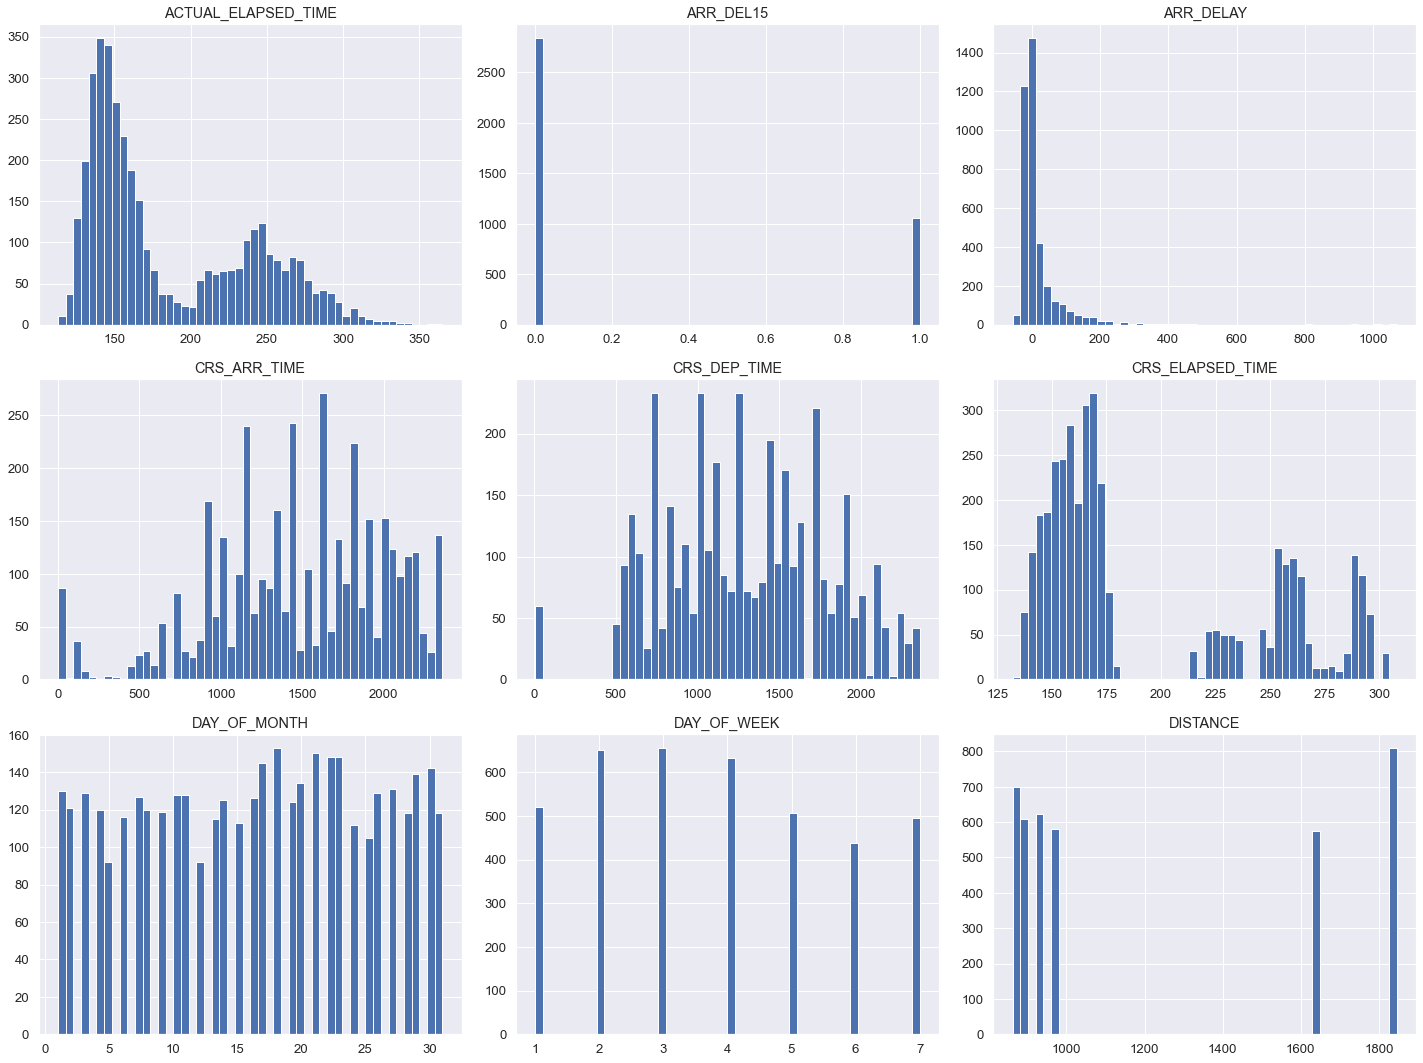

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

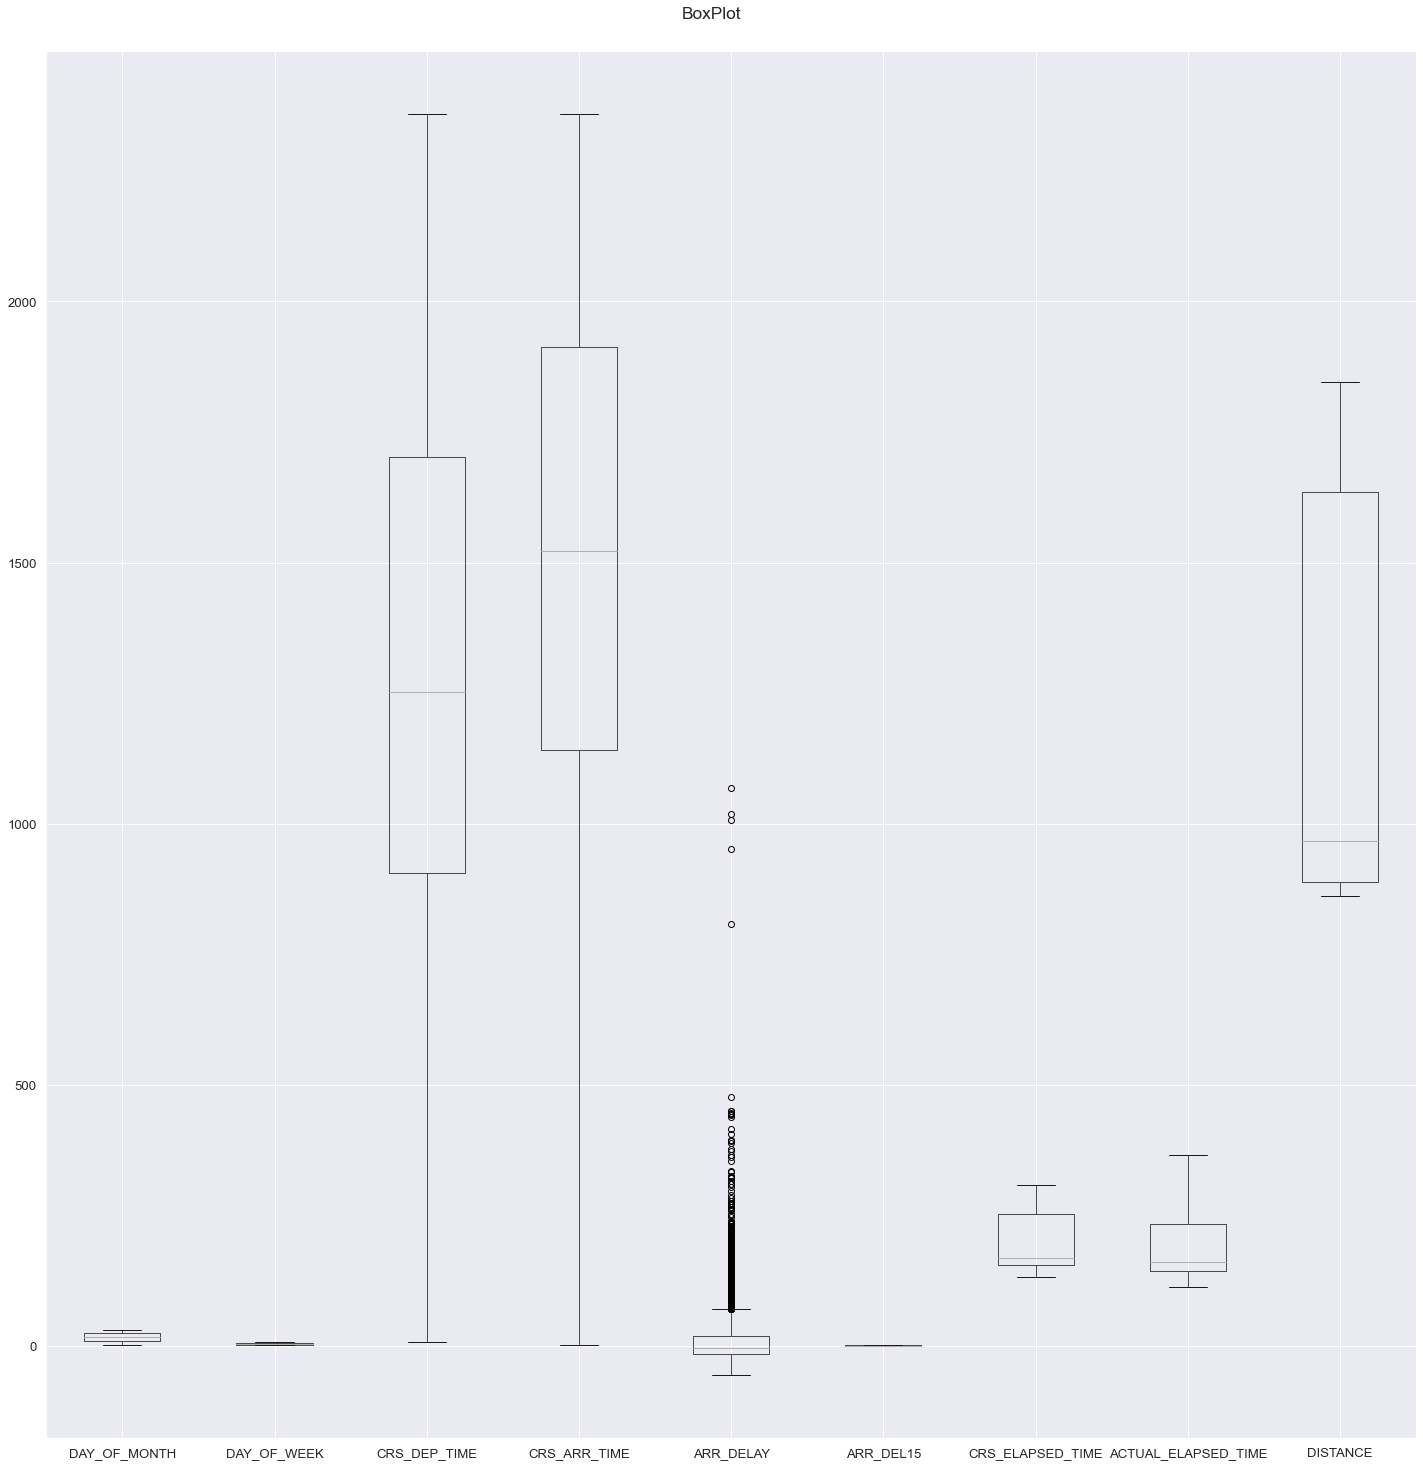

In [21]:
df.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()